11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.3675 - val_loss: 0.2227
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2123 - val_loss: 0.1845
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1806 - val_loss: 0.1652
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1630 - val_loss: 0.1532
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1520 - val_loss: 0.1450
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1449 - val_loss: 0.1398
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1398 - val_loss: 0.1354
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1358 - val_loss: 0.1320
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1326 - val_loss: 0.1296
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1301 - val_loss: 0.1285
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1290 - val_los

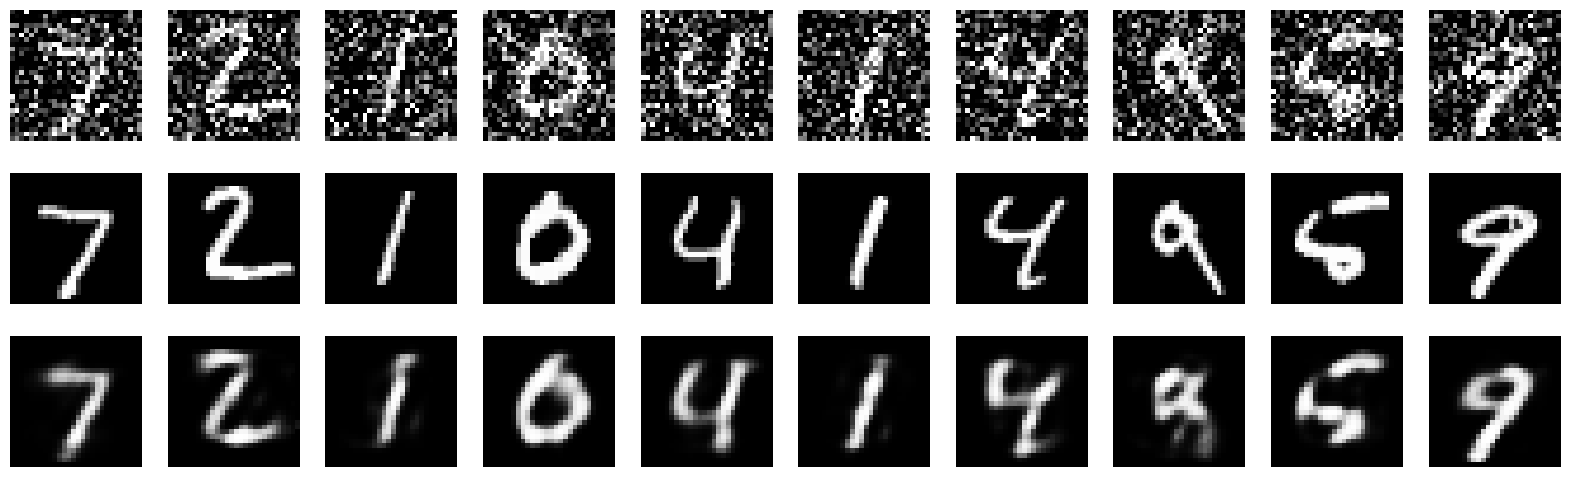

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define encoder
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)

# Define decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Define autoencoder model
denoising_autoencoder = Model(input_img, decoded)

# Compile model
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train model
denoising_autoencoder.fit(x_train_noisy, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Predict reconstructed images
reconstructed_imgs = denoising_autoencoder.predict(x_test_noisy)

# Plot noisy vs. reconstructed images
def plot_images(original, noisy, reconstructed, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Noisy
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Original
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Reconstructed
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

plot_images(x_test, x_test_noisy, reconstructed_imgs)